In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Fetching Processing

In [2]:
g_data=pd.read_csv(r"C:\Users\Garvit Thakan\Desktop\Codes\Projects\Gold Price Prediction\gld_price_data.csv")

In [3]:
g_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
g_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
g_data.shape

(2290, 6)

In [8]:
g_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
# Checking null values
g_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
g_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Finding Correlation

In [11]:
correlation=g_data.corr()

<AxesSubplot:>

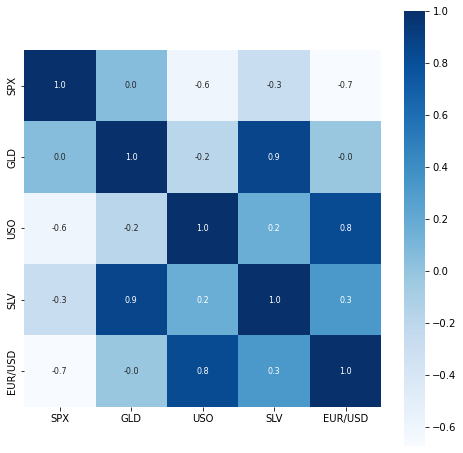

In [16]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [17]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


Positive correlation - SPX, SLV
Negative Correlation - USO, EUR/USD

c:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

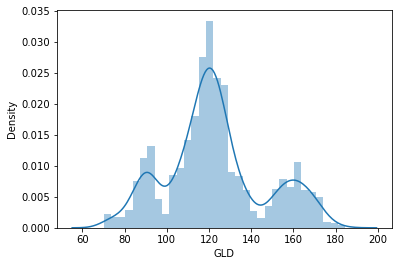

In [19]:
sns.distplot(g_data['GLD'])

In [21]:
X = g_data.drop(['Date','GLD'],axis=1)
Y = g_data['GLD']
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [22]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting Training and test data

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Random Regressor Training Model

In [27]:
regressor = RandomForestRegressor(n_estimators=100)

In [28]:
#training model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [29]:
# Prediction on test data
test_data_prediction = regressor.predict(X_test)

In [30]:
print(test_data_prediction)

[168.59129901  82.10339979 116.06340046 127.6839008  120.61610122
 154.81439771 149.68669737 126.03640051 117.58799868 126.03520054
 116.7628008  171.94540069 141.33779822 167.72199798 115.18430024
 117.44100028 138.68580291 169.77430074 158.54400262 155.51379883
 155.06720043 125.39770054 175.91470074 156.4397028  125.1725001
  93.70059961  77.46390014 120.39189968 119.07109939 167.4775004
  88.09130025 125.17710027  91.31920079 117.62859999 121.07019899
 136.91660081 115.43230129 115.31430076 148.91989958 107.6426011
 104.40150249  87.19879796 126.54990001 117.89480055 152.13249943
 119.72949968 108.25740026 107.84059855  93.22330053 127.04689782
  75.21220056 113.67139938 121.09000026 111.19929888 118.7475989
 120.47699943 159.6084005  168.07710128 147.38789672  85.72149844
  94.48650046  86.81079902  90.59280003 118.96320084 126.45910096
 127.62540027 168.82960003 122.27689917 117.50359911  98.43380042
 168.21700169 143.01789758 132.34150241 121.17880225 121.14299936
 119.64200055 

In [31]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9888146796794702


Comparison of actual and predicted values on a graph

In [32]:
Y_test = list(Y_test)

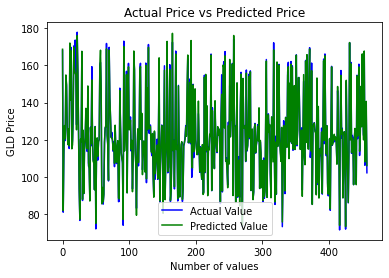

In [45]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()